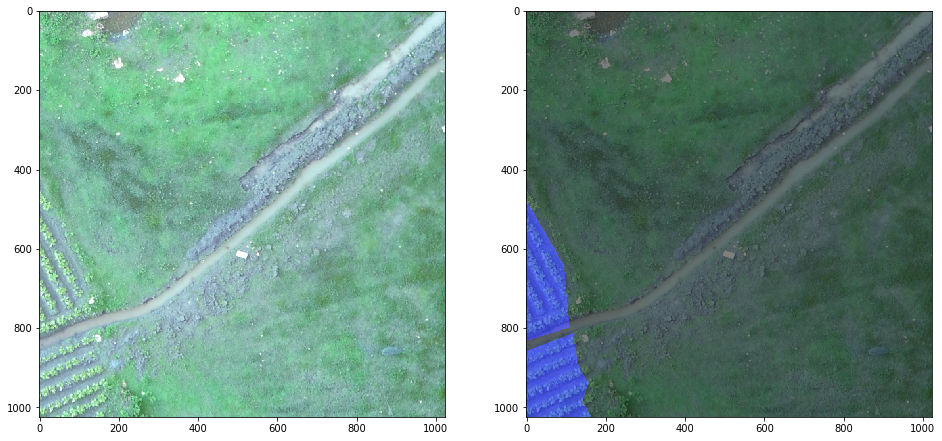

In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append(r"../src/data/")
# import 
import transform as Transforms
from PIL import Image


def mask_vis(label, img=None, alpha=0.5):
    '''
    :param label:原始标签 
    :param img: 原始图像
    :param alpha: 透明度
    :return: 可视化标签
    '''
    r = np.where(label == 1, 255, 0)
    g = np.where(label == 2, 255, 0)
    b = np.where(label == 3, 255, 0)
    yellow = np.where(label == 4, 255, 0)
    anno_vis = np.dstack((b, g, r)).astype(np.uint8)
    # 黄色分量(红255, 绿255, 蓝0)
    anno_vis[:, :, 0] = anno_vis[:, :, 0] + yellow
    anno_vis[:, :, 1] = anno_vis[:, :, 1] + yellow
    anno_vis[:, :, 2] = anno_vis[:, :, 2] + yellow
    if img is None:
        return anno_vis
    else:
        overlapping = cv.addWeighted(img, alpha, anno_vis, 1-alpha, 0)
        return overlapping


def draw(image,mask):
    plt.figure(figsize=(16,8))
    plt.subplot(121)
    plt.imshow(image)
    plt.subplot(122)
    plt.imshow(mask_vis(mask,image))
    
image = cv.imread("image_10_1500.png")
image = cv.cvtColor(image,cv.COLOR_BGR2RGB)
mask = cv.imread("label_10_1500.png",cv.IMREAD_GRAYSCALE)
draw(image,mask)


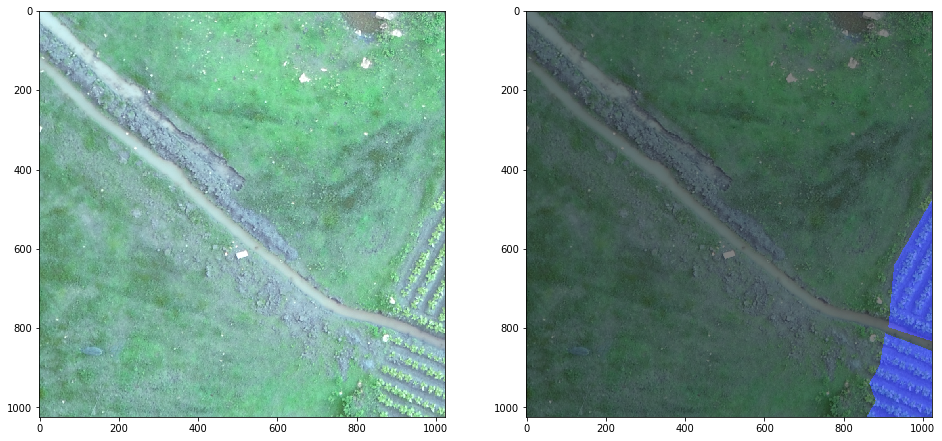

In [18]:
t = Transforms.opencv_transforms.RandomHorizontalFlip(p=1)
sample = {'image':image,'mask':mask}
t_sample = t(sample)
draw(t_sample['image'],t_sample['mask'])

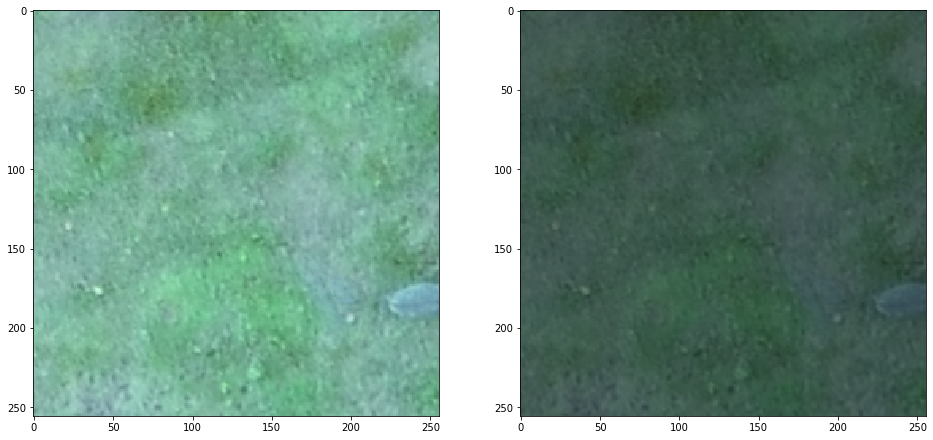

In [19]:
t = Transforms.opencv_transforms.RandomCrop(p=1,output_size=(256,256))
sample = {'image':image,'mask':mask}
t_sample = t(sample)
draw(t_sample['image'],t_sample['mask'])



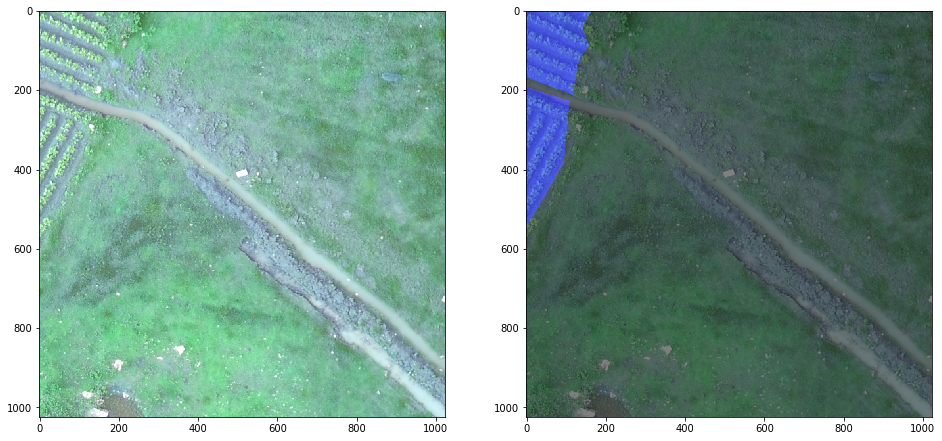

In [21]:
t = Transforms.opencv_transforms.RandomVerticalFlip(p=1)
sample = {'image':image,'mask':mask}
t_sample = t(sample)
draw(t_sample['image'],t_sample['mask'])

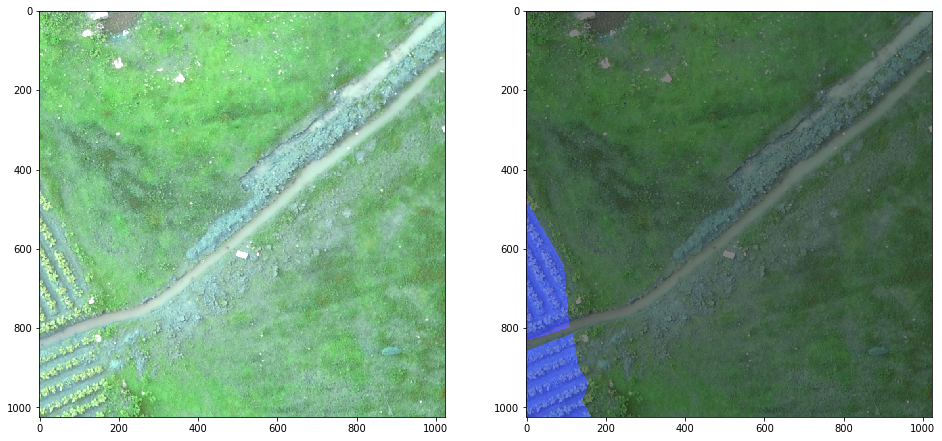

In [25]:
t = Transforms.opencv_transforms.ColorJitter(brightness=0.1,contrast=0.1,saturation=0.1,hue=0.1)
sample = {'image':image,'mask':mask}
t_sample = t(sample)
draw(t_sample['image'],t_sample['mask'])